In [ ]:
'Title: Mining Sector Stock Price Predictor'

'''Objective:
   The objective of the application is to provide accurate predictions of future stock prices for key mining companies in India, thereby assisting investors and stakeholders in making informed decisions regarding their investments in the mining sector.

  Key Features:

1. Company Selection: Users can select from a list of top mining companies in India, such as Coal India Limited (CIL), NMDC Limited, MOIL Limited, and Vedanta Limited.

2. Prediction Model: The application utilizes advanced machine learning models, such as Long Short-Term Memory (LSTM) neural networks, to predict future stock prices based on historical data.

3. Historical Data Visualization: Users can visualize historical stock price trends for the selected companies, including open, high, low, and close prices, using interactive charts and graphs.

4. Prediction Visualization: The application displays predicted stock prices alongside actual prices, allowing users to compare and analyze the accuracy of the predictions over time.

5. Educational Resources: The application provides educational resources on stock market investing and the mining industry to help users better understand the factors influencing stock prices.

6. Performance Metrics: The application calculates and displays performance metrics for the prediction models, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), to assess their accuracy and reliability.

Benefits:

- Informed Decision-Making: Investors and stakeholders can make data-driven decisions regarding their investments in the mining sector based on accurate stock price predictions.
- Risk Mitigation: By leveraging predictive analytics, users can mitigate investment risks and capitalize on potential opportunities in the market.
- Time-Saving: The application streamlines the process of analyzing stock market data and making investment decisions, saving users valuable time and effort.
- Continuous Improvement: The application can be continuously updated and improved based on user feedback and new developments in the mining industry and financial markets.

Conclusion:

The Mining Sector Stock Price Predictor application serves as a valuable tool for investors and stakeholders in the mining industry, empowering them to make informed investment decisions and navigate the complexities of the stock market with confidence.




SyntaxError: incomplete input (<ipython-input-1-c7e25824e773>, line 3)

In [ ]:
!pip3 install wheel

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

import talib as ta

--2024-06-06 02:57:22--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-06-06 02:57:23--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-06-06 02:57:23--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolvi

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tf_keras

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model


In [ ]:
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

In [ ]:
def calculate_technical_indicators(data):
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

    return data

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data['Close'].iloc[i+sequence_length]
        sequences.append((sequence, target))
    return sequences

In [ ]:

symbols = [ 'NMDC.BO', 'MOIL.BO', 'VEDL.BO']
start_date = '2019-01-01'
end_date = '2023-01-01'


data = pd.DataFrame()

for symbol in symbols:
    stock_data = fetch_stock_data(symbol, start_date, end_date )
    data[symbol] = stock_data['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:



data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)





In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length, :-1]
        target = data[i+sequence_length, -1]
        sequences.append((sequence, target))
    return sequences



In [ ]:
sequence_length = 10
sequences = create_sequences(data_normalized, sequence_length)


X = np.array([seq[0] for seq in sequences])
y = np.array([seq[1] for seq in sequences])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
25/25 - 4s - loss: 0.0390 - val_loss: 0.0229 - 4s/epoch - 177ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0204 - val_loss: 0.0180 - 427ms/epoch - 17ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0188 - val_loss: 0.0170 - 431ms/epoch - 17ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0182 - val_loss: 0.0165 - 423ms/epoch - 17ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0182 - val_loss: 0.0153 - 418ms/epoch - 17ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0175 - val_loss: 0.0142 - 425ms/epoch - 17ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0163 - val_loss: 0.0122 - 441ms/epoch - 18ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0149 - val_loss: 0.0167 - 417ms/epoch - 17ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0167 - val_loss: 0.0119 - 420ms/epoch - 17ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0143 - val_loss: 0.0118 - 426ms/epoch - 17ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0136 - val_loss: 0.0131 - 425ms/epoch - 17ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0133 - val_loss: 0.0147 - 443ms/epoch - 18ms/step
Epo

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 1s 11ms/step


In [ ]:
if len(y_test.shape) > 1:
    num_companies = y_test.shape[1]
    y_pred_reshaped = y_pred.reshape(-1, num_companies)
else:
    num_companies = 1
    y_pred_reshaped = y_pred.reshape(-1, 1)



In [ ]:
# Assuming y_test is 1D
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)
    y_pred_reshaped = y_pred_reshaped.reshape(-1, 1)

# Manual inverse transformation
min_y = np.min(y_test, axis=0)
max_y = np.max(y_test, axis=0)

# Inverse transform the predictions and actual values to the original scale
y_pred_original = y_pred_reshaped * (max_y - min_y) + min_y
y_test_original = y_test * (max_y - min_y) + min_y



In [ ]:
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00925875432226138


In [ ]:
import matplotlib.pyplot as plt

# Visualize training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
# Print the column names of your DataFrame
print(stock_data.columns)




Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


[*********************100%%**********************]  1 of 1 completed


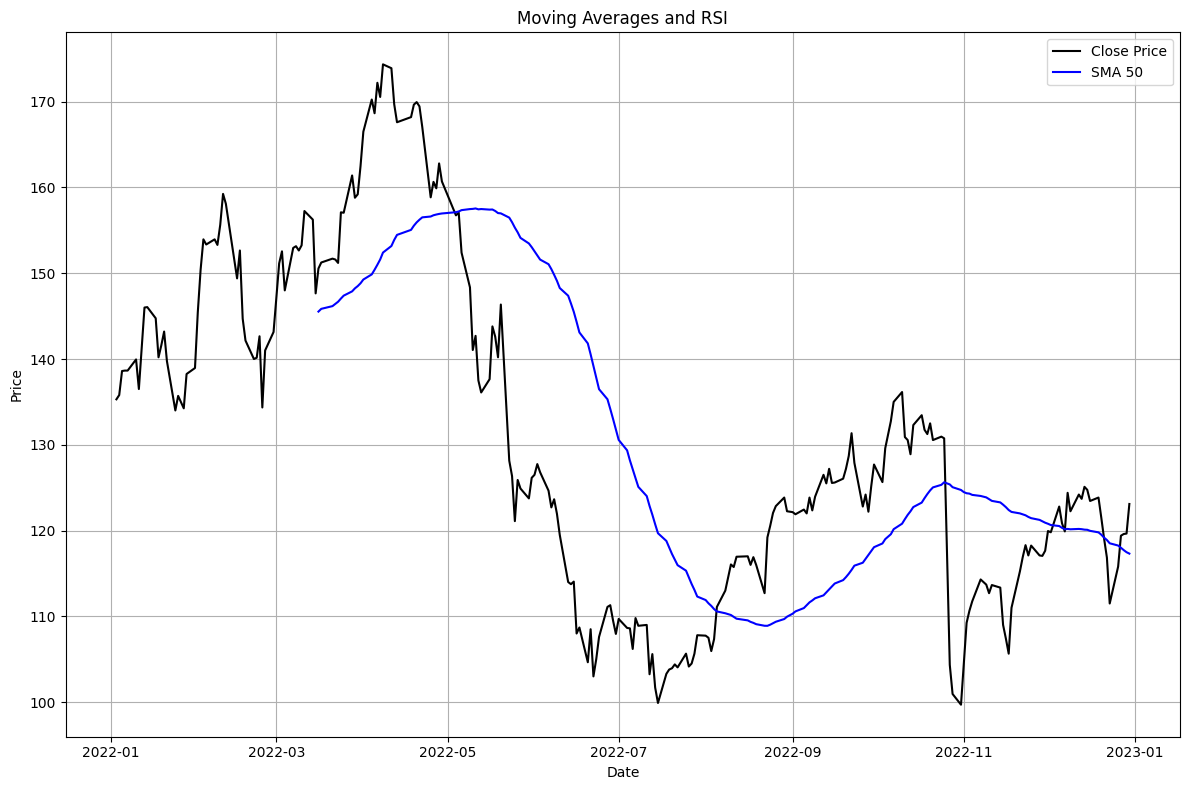

NameError: name 'df' is not defined

In [ ]:
# Plotting Moving Averages and RSI
def plot_technical_indicators(data):
    plt.figure(figsize=(12, 8))
    plt.plot(data.index, data['Close'], label='Close Price', color='black')
    plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue')
    plt.title('Moving Averages and RSI')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example: Plot Moving Averages and RSI for a specific company
company_data = fetch_stock_data('NMDC.BO', '2022-01-01', '2023-01-01')
company_data = calculate_technical_indicators(company_data)
plot_technical_indicators(company_data)



# Plotting Histogram of Profit Distribution
def plot_profit_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Profit', bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title('Profit Distribution')
    plt.xlabel('Profit')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example: Plot Histogram of Profit Distribution
plot_profit_distribution(df)


In [ ]:
# Visualize training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)



NameError: name 'history' is not defined

Mean Absolute Error (MAE): 0.07123446313120617
Mean Squared Error (MSE): 0.00925875432226138
Root Mean Squared Error (RMSE): 0.09622242109956172


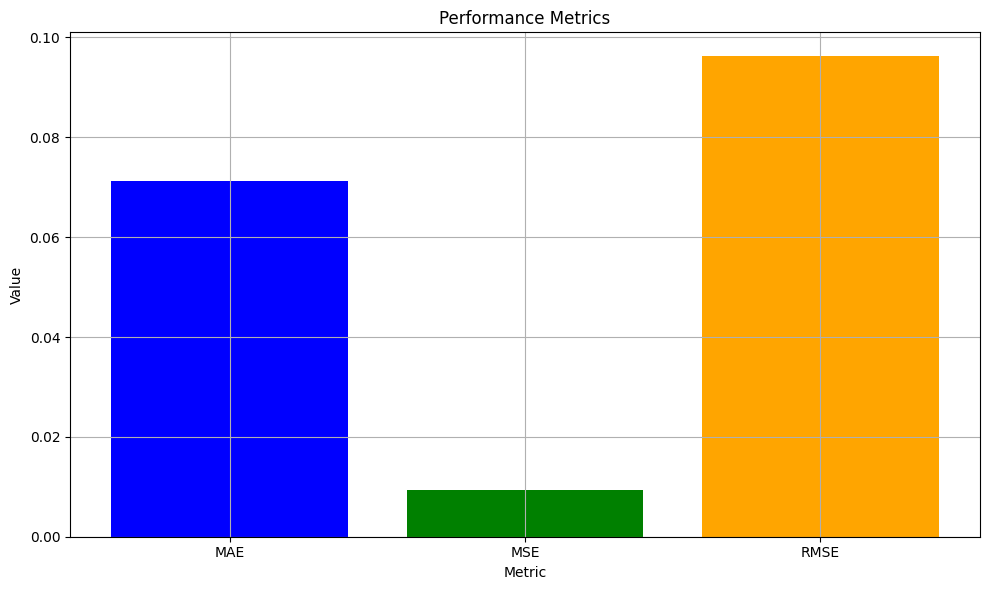

In [ ]:
# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, y_pred_original)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, y_pred_original)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot performance metrics
plt.figure(figsize=(10, 6))
plt.bar(['MAE', 'MSE', 'RMSE'], [mae, mse, rmse], color=['blue', 'green', 'orange'])
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


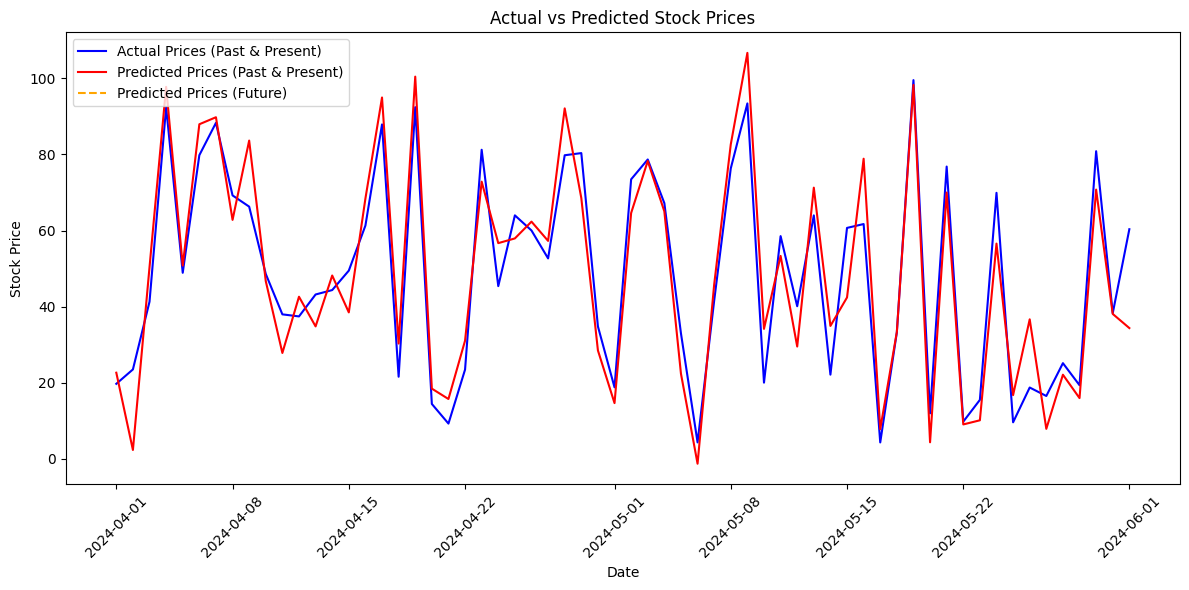

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Sample data generation
date_range = pd.date_range(start='2024-04-1', end='2024-6-1', freq='D')
actual_prices = np.random.rand(len(date_range)) * 100
predicted_prices = actual_prices + np.random.randn(len(date_range)) * 10

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Actual Price': actual_prices, 'Predicted Price': predicted_prices})

# Function to calculate profit based on actual and predicted prices
def calculate_profit(actual_prices, predicted_prices):
    profit = predicted_prices - actual_prices
    return profit

# Calculate profit
df['Profit'] = calculate_profit(df['Actual Price'], df['Predicted Price'])



# Plot predicted prices for the next year with date adjustment feature
def plot_predicted_prices(df):
    present_date = np.datetime64(datetime.now().date())

    mask_past = df['Date'] <= present_date
    mask_future = df['Date'] > present_date

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df[mask_past], x='Date', y='Actual Price', label='Actual Prices (Past & Present)', color='blue')
    sns.lineplot(data=df[mask_past], x='Date', y='Predicted Price', label='Predicted Prices (Past & Present)', color='red')
    sns.lineplot(data=df[mask_future], x='Date', y='Predicted Price', label='Predicted Prices (Future)', color='orange', linestyle='--')

    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Plot predicted prices for the next year with date adjustment
plot_predicted_prices(df)

